In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp

In [116]:
df = pd.read_csv('/home/metras/Desktop/projetos/dashboards/tatico/sales_data_sample.csv', encoding='Windows-1252')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [117]:
df.dropna(axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [118]:
df.drop(columns=['PHONE', 'ADDRESSLINE1', 'MSRP', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERNUMBER', 'ORDERLINENUMBER'], inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 308.9+ KB


In [120]:
df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000
mean,35.092809,83.658544,3553.889072,2.717676,7.092455,2003.81509
std,9.741443,20.174277,1841.865106,1.203878,3.656633,0.69967
min,6.000000,26.880000,482.130000,1.000000,1.000000,2003.00000
25%,27.000000,68.860000,2203.430000,2.000000,4.000000,2003.00000
50%,35.000000,95.700000,3184.800000,3.000000,8.000000,2004.00000
75%,43.000000,100.000000,4508.000000,4.000000,11.000000,2004.00000
max,97.000000,100.000000,14082.800000,4.000000,12.000000,2005.00000


In [121]:
sales_country = df.groupby('COUNTRY')['SALES'].sum().reset_index()

In [122]:
sales_country

,COUNTRY,SALES
0,Australia,630623.10
1,Austria,202062.53
2,Belgium,108412.62
3,Canada,224078.56
4,Denmark,245637.15
5,Finland,329581.91
6,France,1110916.52
7,Germany,220472.09
8,Ireland,57756.43
9,Italy,374674.31


Text(0.5, 1.0, 'Vendas por paises')

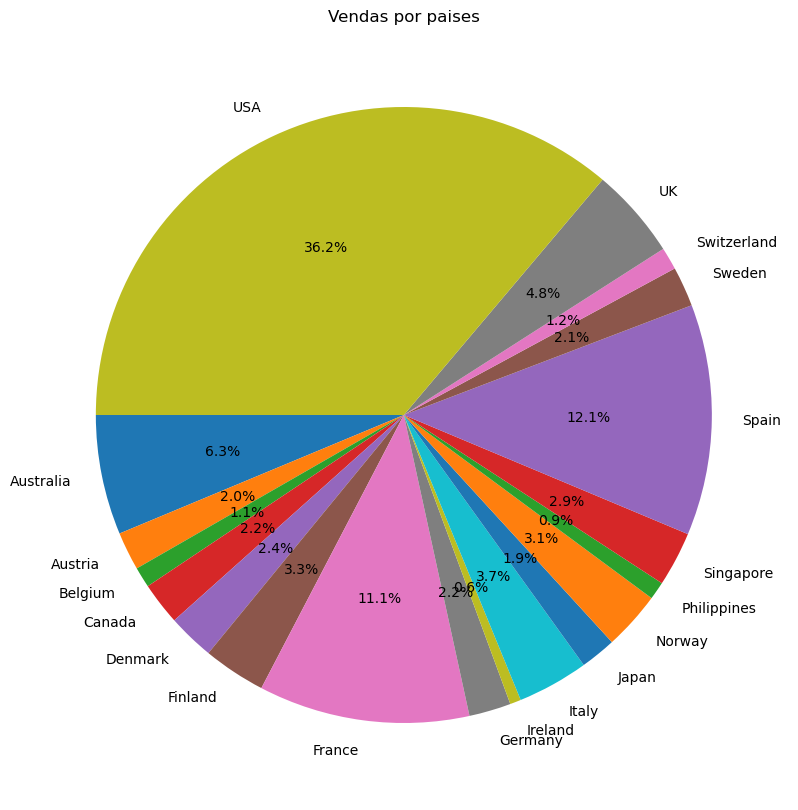

In [123]:
plp.figure(figsize=(10,10))
plp.pie(sales_country['SALES'], labels=sales_country["COUNTRY"], autopct='%1.1f%%', startangle=180)
plp.title("Vendas por paises")

In [162]:
def salesPerCountry(df, country): #retorno somente duas colunas, perco informações de outras.
    salesPerCountry = df.loc[df['COUNTRY'] == country] #filtro somente o pais que eu quero
    # salesPerCountry = salesPerCountry[['CITY', 'SALES']] #seleciono somente essas colunas
    salesPerCountry = salesPerCountry.groupby(['CITY', 'PRODUCTLINE', 'STATUS'])[['SALES', 'QUANTITYORDERED']].sum().reset_index()
    # salesPerCountry = salesPerCountry.groupby('SALES')
    # salesPerCountry.sort_values(by='SALES', inplace=True)
    return salesPerCountry

In [165]:
salesUSA = salesPerCountry(df, 'USA')
salesUSA.info()
salesUSA.nunique()
salesUSA['STATUS'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CITY             125 non-null    object 
 1   PRODUCTLINE      125 non-null    object 
 2   STATUS           125 non-null    object 
 3   SALES            125 non-null    float64
 4   QUANTITYORDERED  125 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ KB


array(['Shipped', 'In Process', 'On Hold', 'Cancelled', 'Resolved'],
      dtype=object)

In [126]:
# salesUSA = df.groupby('COUNTRY')['SALES'].sum().reset_index()
# salesUSA.sort_values(by='SALES', inplace=True)

Text(0.5, 1.0, 'Vendas por Cidades do USA')

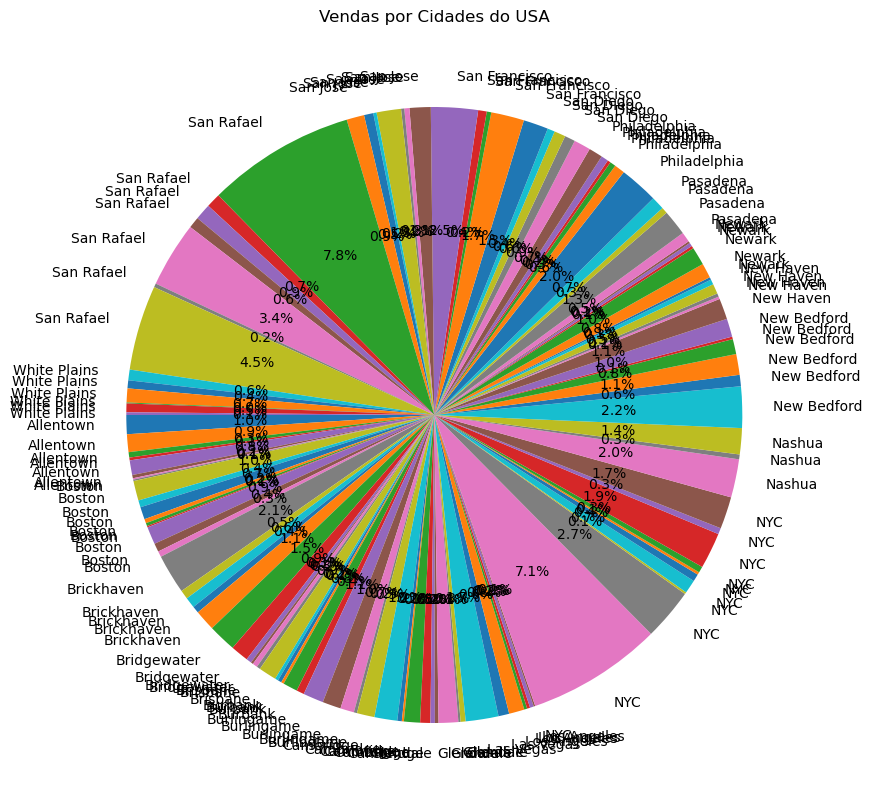

In [171]:
plp.figure(figsize=(10,10))
plp.pie(salesUSA['SALES'], labels=salesUSA['CITY'], autopct='%1.1f%%', startangle=180)
plp.title("Vendas por Cidades do USA")

Text(0.5, 1.0, 'Vendas por Cidades da França')

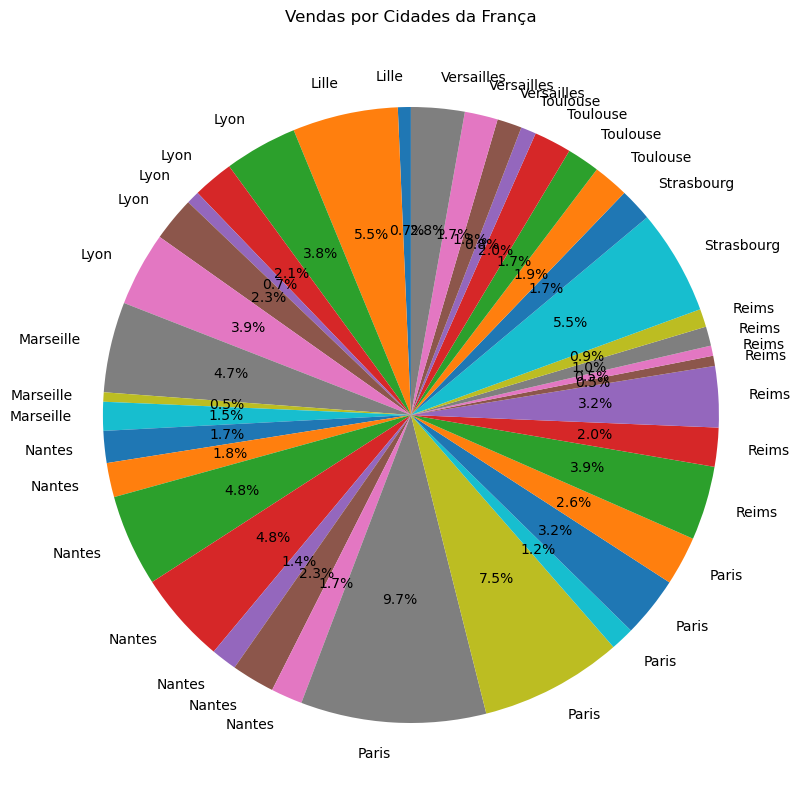

In [167]:
salesFrance = salesPerCountry(df, 'France')
plp.figure(figsize=(10,10))
plp.pie(salesFrance['SALES'], labels=salesFrance['CITY'], startangle=90, autopct='%1.1f%%')
plp.title("Vendas por Cidades da França")

In [129]:
# plp.bar(salesFrance, height=)

In [135]:
salesFrance

,CITY,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
8,Versailles,637,1484.86,64834.32,10/11/2004 0:002/2/2004 0:0010/11/2004 0:0010/...,ShippedShippedShippedShippedShippedShippedShip...,69,172,36072,Classic CarsTrucks and BusesTrucks and BusesTr...,S10_1949S12_1666S12_1666S18_1097S18_1342S18_13...,Auto Assoc. & Cie.Auto Assoc. & Cie.Auto Assoc...,FranceFranceFranceFranceFranceFranceFranceFran...,LargeMediumMediumMediumMediumSmallSmallMediumM...
0,Lille,699,1606.93,69052.41,11/11/2003 0:0011/11/2003 0:0011/11/2003 0:001...,ShippedShippedShippedShippedShippedShippedShip...,62,166,40066,MotorcyclesMotorcyclesMotorcyclesMotorcyclesMo...,S10_1678S10_2016S10_4698S12_2823S12_2823S18_26...,Daedalus Designs ImportsDaedalus Designs Impor...,FranceFranceFranceFranceFranceFranceFranceFran...,SmallMediumLargeMediumMediumSmallSmallSmallMed...
7,Toulouse,687,1701.95,70488.44,11/8/2003 0:007/4/2003 0:0011/8/2003 0:007/4/2...,ShippedShippedShippedShippedShippedShippedShip...,62,168,40070,Classic CarsClassic CarsPlanesClassic CarsShip...,S10_4757S18_1129S18_1662S18_1984S18_3029S18_32...,Alpha CognacAlpha CognacAlpha CognacAlpha Cogn...,FranceFranceFranceFranceFranceFranceFranceFran...,MediumMediumMediumMediumMediumLargeMediumSmall...
2,Marseille,804,1919.25,74936.14,5/8/2003 0:005/8/2003 0:005/8/2003 0:005/8/200...,ShippedShippedShippedShippedShippedShippedShip...,63,163,50084,Classic CarsClassic CarsClassic CarsClassic Ca...,S12_1099S12_3380S12_3990S12_4675S18_1129S18_17...,Marseille Mini AutosMarseille Mini AutosMarsei...,FranceFranceFranceFranceFranceFranceFranceFran...,LargeMediumSmallSmallMediumLargeMediumMediumSm...
6,Strasbourg,779,1565.18,80438.48,4/14/2005 0:004/13/2004 0:004/13/2004 0:004/14...,ShippedShippedShippedShippedShippedShippedShip...,38,80,38081,Classic CarsClassic CarsVintage CarsClassic Ca...,S12_4675S18_1589S18_1749S18_1889S18_2248S18_27...,Mini CaravyMini CaravyMini CaravyMini CaravyMi...,FranceFranceFranceFranceFranceFranceFranceFran...,LargeSmallLargeMediumSmallMediumMediumLargeMed...
5,Reims,1433,3320.84,135042.94,5/7/2003 0:0012/15/2004 0:0012/15/2004 0:005/7...,ShippedShippedShippedShippedShippedShippedShip...,96,269,82173,MotorcyclesClassic CarsClassic CarsMotorcycles...,S10_1678S10_4757S12_1108S12_2823S12_3891S18_15...,Reims CollectablesReims CollectablesReims Coll...,FranceFranceFranceFranceFranceFranceFranceFran...,SmallSmallMediumLargeMediumMediumMediumMediumS...
1,Lyon,1428,3417.92,142874.25,11/25/2003 0:0011/25/2003 0:001/2/2004 0:0011/...,ShippedShippedShippedShippedShippedShippedShip...,74,181,82153,Classic CarsClassic CarsClassic CarsTrucks and...,S10_1949S10_4962S12_1108S12_1666S12_3148S12_38...,"Saveley & Henriot, Co.Saveley & Henriot, Co.Sa...",FranceFranceFranceFranceFranceFranceFranceFran...,LargeMediumLargeMediumMediumMediumSmallSmallSm...
3,Nantes,2102,4979.20,204304.86,7/23/2004 0:002/3/2005 0:007/23/2004 0:009/27/...,ShippedShippedShippedShippedShippedIn ProcessS...,141,340,120264,MotorcyclesMotorcyclesMotorcyclesMotorcyclesMo...,S10_1678S10_1678S10_2016S10_2016S10_4698S10_49...,La Rochelle GiftsLa Rochelle GiftsLa Rochelle ...,FranceFranceFranceFranceFranceFranceFranceFran...,MediumSmallSmallMediumMediumMediumMediumMedium...
4,Paris,2521,5924.74,268944.68,7/1/2003 0:001/15/2004 0:007/1/2003 0:004/7/20...,ShippedShippedShippedShippedShippedShippedShip...,171,421,140270,MotorcyclesMotorcyclesMotorcyclesMotorcyclesMo...,S10_1678S10_1678S10_2016S10_2016S10_4698S10_47...,Lyon SouveniersAuto Canal PetitLyon Souveniers...,FranceFranceFranceFranceFranceFranceFranceFran...,MediumMediumMediumMediumLargeMediumMediumLarge...
